# Location of the hydrographic section corresponding with OSNAP East and location of LOCO mooring

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir, mooring_west, mooring_east, axSettingsLC

import warnings
warnings.filterwarnings('ignore')

In [2]:
bounds_lon = [-45,-25]
bounds_lat = [55,65]

# Hydrographic section coordinates
data = sio.loadmat(datadir+'hydrographic_sections.mat')
lon_section = data['lon'][0]
lat_section = data['lat'][0]
dist = data['distance'][0]

# LOCO coordinates
loco = sio.loadmat(datadir+'LOCO2x.mat')['LOCO2']
lat_loco = loco['lat'][0,0][0]
lon_loco = loco['lon'][0,0][0]

# DCA contour
x = np.load(datadir+'DCA_contour_x.npy')
y = np.load(datadir+'DCA_contour_y.npy')

# Bathymetry
topodata = sio.loadmat(datadir+'subpolartopo.mat')
topo = topodata['topogrid']
topo_lat = topodata['topolat']
topo_lon = topodata['topolon']

ind_lat_lower = np.argwhere(topo_lat[0,:]<=bounds_lat[1])[0][0]
ind_lat_upper = np.argwhere(topo_lat[0,:]>=bounds_lat[0])[-1][0]
ind_lon_left = np.argwhere(topo_lon[:,0]>=bounds_lon[0])[0][0]
ind_lon_right = np.argwhere(topo_lon[:,0]<=bounds_lon[1])[-1][0]

sublat = topo_lat[ind_lon_left:ind_lon_right+1,ind_lat_lower:ind_lat_upper+1]
sublon = topo_lon[ind_lon_left:ind_lon_right+1,ind_lat_lower:ind_lat_upper+1]
subtopo = topo[ind_lon_left:ind_lon_right+1,ind_lat_lower:ind_lat_upper+1]

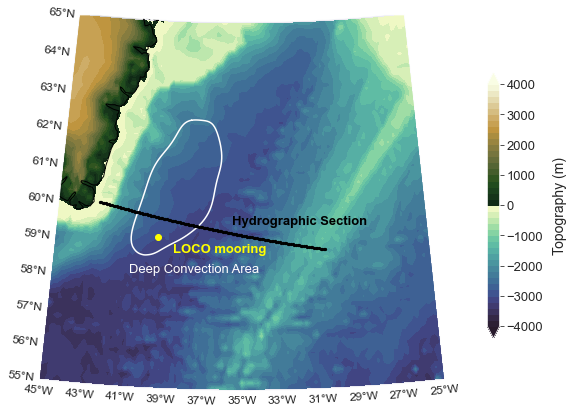

In [3]:
projection = ccrs.LambertConformal(central_longitude=np.mean(bounds_lon),central_latitude=np.mean(bounds_lat))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7), subplot_kw={'projection': projection})
axSettingsLC(ax,bounds_lon,bounds_lat)
p = ax.contourf(sublon,sublat,subtopo,cmap='cmo.topo',levels=np.arange(-4000,4001,200),extend='both',
            transform=ccrs.PlateCarree())
cbar = fig.colorbar(p, ax=ax, shrink = 0.7, anchor=(1,0.5))
cbar.set_label('Topography (m)', fontsize=14, labelpad=10)
cbar.ax.tick_params(labelsize=13)

# DCA
ax.plot(x,y,color='white',linewidth=1.5, transform=ccrs.PlateCarree())
ax.text(np.min(x),np.min(y)-0.5,'Deep Convection Area', color='white',fontsize=13, transform=ccrs.PlateCarree())

# Section line
ax.scatter(lon_section,lat_section,transform=ccrs.PlateCarree(),color='k',s=5,zorder=5)
ax.text(mooring_east[0]-5,mooring_east[1]+0.75,'Hydrographic Section',color='k',fontsize=13,weight='bold',transform=ccrs.PlateCarree())

# LOCO mooring
ax.scatter(lon_loco,lat_loco,transform=ccrs.PlateCarree(),color='yellow')
ax.text(lon_loco+0.85,lat_loco-0.4,'LOCO mooring',color='yellow',fontsize=13,weight='bold',transform=ccrs.PlateCarree())

plt.savefig(figdir+'map_section_loco.png',bbox_inches='tight')
plt.show()

To find where section intersects DCA: zoom in and count dots from the western edge:

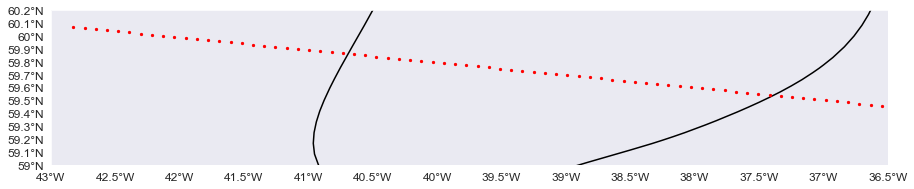

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(x,y,color='k',linewidth=1.5, transform=ccrs.PlateCarree())
ax.scatter(lon_section,lat_section,transform=ccrs.PlateCarree(),color='red',s=5,zorder=5)
ax.set_extent([-43,-36.5,59,60.2])
ax.set_yticks(np.arange(59,60.2,0.1), crs=ccrs.PlateCarree())
ax.set_yticklabels(np.arange(59,60.2,0.1), fontsize=12)
ax.set_xticks(np.arange(-43,-36.4,0.5), crs=ccrs.PlateCarree())
ax.set_xticklabels(np.arange(-43,-36.4,0.5), fontsize=12)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle=':')
plt.show()

In [5]:
# WESTERN BOUNDARY
print(lon_section[24])
print(lat_section[24])
print(dist[24]/1e3)

-40.732508156028366
59.866232621347514
120.18625605666244


In [6]:
# EASTERN BOUNDARY
print(lon_section[62])
print(lat_section[62])
print(dist[62]/1e3)

-37.41868356973995
59.543389832647755
310.4811614797113


So the section intersects the DCA at ~120 km and ~310 km.